In [1]:
import librosa
import re
import os
import random
import csv
import numpy as np
#the audio path where the files reside
audio_path = r'C:\Users\Faisal\Downloads\SUBESCO\SUBESCO'
audio = audio_path + '\F_01_OISHI_S_1_ANGRY_1.wav'
x , sr = librosa.load(audio,sr=None)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
import IPython.display as ipd
audio_path = r'C:\Users\Faisal\Downloads\SUBESCO\SUBESCO'
audio = audio_path + '\F_01_OISHI_S_1_DISGUST_5.wav'
ipd.Audio(audio)

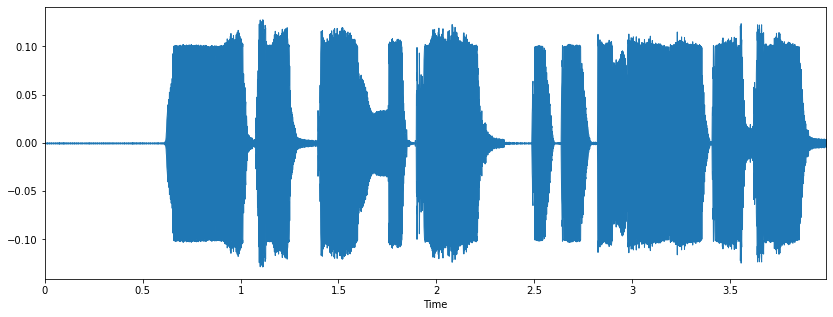

In [3]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

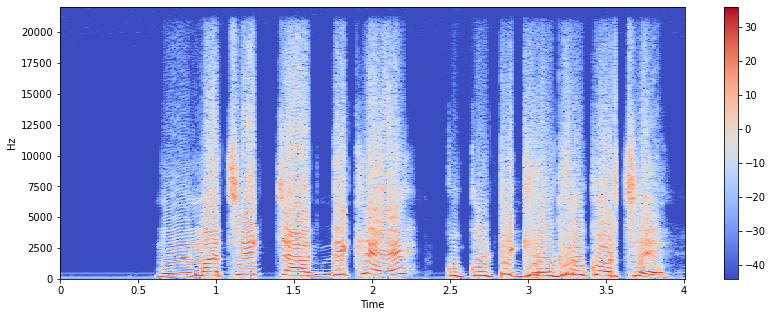

In [4]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [5]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))

13474


(20, 345)


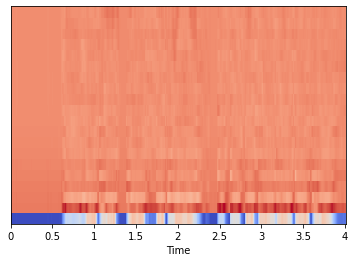

In [6]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [7]:
header = 'filename name gender label chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()
print(header)

['filename', 'name', 'gender', 'label', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']


In [14]:
# header - to make the header for the data file and create a csv and write the header file
header = ['filename', 'name', 'gender', 'label', 'label_id']
file = open(r'C:\Users\Faisal\Downloads\SUBESCO\data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [15]:
#map them accordingly
class_mapping = {
    "ANGRY":0,
    "DISGUST":1,
    "FEAR":2,
    "HAPPY":3,
    "NEUTRAL":4,
    "SAD":5,
    "SURPRISE":6    
}

total = []
allFiles = os.listdir(audio_path)
for filename in allFiles:
    audio = audio_path +'\\'+ filename 
    
    name_split = re.split("_", filename)
    name, gender,label = name_split[2],name_split[0],name_split[5]
    label_id = class_mapping[label]
    
#     y, sr = librosa.load(audio, sr=None)
#     chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#     rmse = librosa.feature.rms(y=y)
#     spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#     spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#     rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#     zcr = librosa.feature.zero_crossing_rate(y)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr)
    
#     to_append = f'{filename} {name} {gender} {label} {label_id} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    
#     for e in mfcc:
#         to_append += f' {np.mean(e)}'
    
    to_append = f'{filename} {name} {gender} {label} {label_id}'    
    file = open(r'C:\Users\Faisal\Downloads\SUBESCO\data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
        
print("DONEEEEE!!!")

DONEEEEE!!!
